<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/023-dimensionality-reduction/PCA_with_Synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to generate some synthetic data and get more acquainted with how PCA works.

## Let's create the data first.

In [84]:
import numpy as np

# First distribution
# Mean and covariance
mean = [0, 0, 0]
covariance = np.diag([1,2,1]) #np.eye(3)

# Generating random samples
num_samples = 100
samples = np.random.multivariate_normal(mean, covariance, num_samples)

In [85]:
# Second distribution
# Mean and covariance
mean = [3, 3, 3]
covariance = np.diag([2,1,1])

# Generating random samples
num_samples = 2000
samples2 = np.random.multivariate_normal(mean, covariance, num_samples)

In [86]:
# Third distribution
# Mean and covariance
mean = [5, 5, 5]
covariance = np.diag([0.5,1,0.5])

# Generating random samples
num_samples = 150
samples3 = np.random.multivariate_normal(mean, covariance, num_samples)

In [87]:
import pandas as pd

df_3d = pd.DataFrame(samples, columns=['x', 'y', 'z'])
df_3d = pd.concat([df_3d, pd.DataFrame(samples2, columns=['x', 'y', 'z'])], axis=0)
df_3d = pd.concat([df_3d, pd.DataFrame(samples3, columns=['x', 'y', 'z'])], axis=0)

In [88]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

## Now, let's apply PCA

Create the model

In [89]:
from sklearn.decomposition import PCA

# Create the model
model = PCA()

#fit the data
model.fit(df_3d)

PCA()

In [90]:
df_3d

,x,y,z
0,0.691486,-0.240445,-1.538622
1,-0.779783,1.002509,-1.004815
2,1.034958,2.372048,-1.106515
3,0.817186,-1.394915,-1.209870
4,1.116727,-1.261476,1.413132
...,...,...,...
145,5.482003,5.898952,5.518240
146,5.936578,4.617290,5.576764
147,3.635342,5.660158,5.756089
148,5.495493,4.375064,4.861882


Apply the model

In [91]:
import pandas as pd

# transform data to the new space
transformed_data = model.transform(df_3d)

# create a df out of the transformed data
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3'])
transformed_data_df

,PC1,PC2,PC3
0,5.406706,2.288726,-1.287904
1,5.609850,0.319430,-1.561980
2,3.652100,0.784399,-2.625128
3,5.735886,2.920556,-0.313681
4,4.220217,1.925082,1.609715
...,...,...,...
2245,-4.455940,-1.113271,-0.024903
2246,-4.176405,-0.066393,0.798885
2247,-3.102076,-2.330619,0.432119
2248,-3.398677,0.082522,0.428414


Let's plot the transformed data

In [92]:
import plotly.express as px

fig = px.scatter_3d(transformed_data_df, x='PC1', y='PC2', z='PC3')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

What do you notice about the transformed data?

Let's look at the resulting components

In [93]:
components_df = pd.DataFrame(model.components_, index=['PC1', 'PC2', 'PC3'], columns = ['x', 'y', 'z'])
components_df

,x,y,z
PC1,-0.729162,-0.498146,-0.469227
PC2,0.681119,-0.594736,-0.427044
PC3,-0.066336,-0.630983,0.772955


What do you think is the magnitude of each of these?

In [94]:
components_df['magnitude'] = components_df.apply(lambda row: np.sqrt(np.sum(row**2)), axis=1)
components_df

,x,y,z,magnitude
PC1,-0.729162,-0.498146,-0.469227,1.0
PC2,0.681119,-0.594736,-0.427044,1.0
PC3,-0.066336,-0.630983,0.772955,1.0


Let's plot the scaled version of these components by scaling them in proportion to their standard deviations. This is called the **loadings**.

In [95]:
loadings = components_df.drop('magnitude', axis=1).mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings, index=['PC1', 'PC2', 'PC3'], columns = ['x', 'y', 'z'])
loadings_df

,x,y,z
PC1,-1.368268,-0.934768,-0.880501
PC2,0.827977,-0.722969,-0.519120
PC3,-0.066776,-0.635165,0.778078


How do we prove they are perpendicular to each other?

In [96]:
sum(loadings_df.iloc[0]*loadings_df.iloc[2])

-1.1102230246251565e-16

In [97]:
import plotly.graph_objects as go

def plot_arrows(fig, df, mean):
  for i in range(df.shape[0]): # For all components
    # Add a line to represent the vector
    fig.add_trace(go.Scatter3d(
        x=[mean['x'], mean['x'] + df.iloc[i]['x']],
        y=[mean['y'], mean['y'] + df.iloc[i]['y']],
        z=[mean['z'], mean['z'] + df.iloc[i]['z']],
        mode='lines',
        line=dict(color='red', width=5),
    ))

    # Add a cone to represent the arrowhead of the vector
    fig.add_trace(go.Cone(
        x=[mean['x'] + df.iloc[i]['x']],
        y=[mean['y'] + df.iloc[i]['y']],
        z=[mean['z'] + df.iloc[i]['z']],
        u=[df.iloc[i]['x']],
        v=[df.iloc[i]['y']],
        w=[df.iloc[i]['z']],
        sizemode="absolute",
        sizeref=0.1
    ))

In [98]:
fig = px.scatter_3d(df_3d, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)

plot_arrows(fig, loadings_df, df_3d.mean())

fig.show()

Let's plot the explained variance for each component

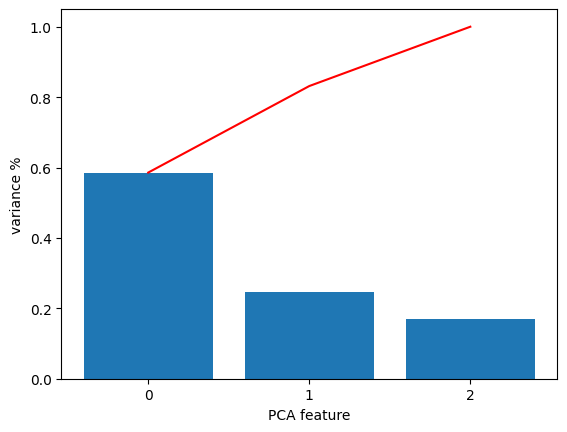

In [99]:
import matplotlib.pyplot as plt

component_ids = range(model.n_components_)
plt.bar(component_ids, model.explained_variance_ratio_)
plt.plot(component_ids, np.cumsum(model.explained_variance_ratio_), color='red')
plt.xticks(component_ids)
plt.ylabel('variance %')
plt.xlabel('PCA feature')
plt.show()

Let's take a 2D projection using the 2 most important components.

First, use a PCA with 2D

In [100]:
# Create the model
model = PCA(2)

#fit the data
model.fit(df_3d)
transformed_data = model.transform(df_3d)

Let's plot the projection

In [101]:
transformed_data_df = pd.DataFrame(transformed_data, columns=['x', 'y'])

fig = px.scatter(transformed_data_df, x='x', y='y')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)


fig.show()

Let's plot the "reconstructed" data in the original space

In [102]:
reconstruced_data = model.inverse_transform(transformed_data_df)
reconstruced_data_df = pd.DataFrame(reconstruced_data, columns = ['x', 'y', 'z'])

In [104]:
fig = px.scatter_3d(reconstruced_data_df, x='x', y='y', z='z')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)

fig.show()

##Questions

1. Can you plot the boxplots that show the variance of the data along each PC?